# SAPDE_domain_outline.ipynb

```
H Thompson
UQAM
April 2020
```

* Figure for displaying SPADE domain used in GEM simulations

## Imports

In [2]:
import numpy as np 

from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature

from netCDF4 import Dataset as cdf4_ds

from metpy.units import units

from scipy.ndimage import gaussian_filter


from matplotlib.colors import LightSource, Normalize

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker

from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature



%matplotlib inline
plt.style.use('seaborn-white')

## Label functions

In [3]:
def cartopy_xlabel(ax,x_lons,myproj,tick_fs):    
    #transform the corner points of my map to lat/lon
    xy_bounds = ax.get_extent()
    ll_lonlat = ccrs.Geodetic().transform_point(xy_bounds[0],xy_bounds[2], myproj)
    lr_lonlat = ccrs.Geodetic().transform_point(xy_bounds[1],xy_bounds[2], myproj)
    #take the median value as my fixed latitude for the x-axis
    l_lat_median = np.median([ll_lonlat[1],lr_lonlat[1]]) #use this lat for transform on lower x-axis
    x_lats_helper = np.ones_like(x_lons)*l_lat_median

    x_lons = np.asarray(x_lons)
    x_lats_helper = np.asarray(x_lats_helper)
    x_lons_xy = myproj.transform_points(ccrs.Geodetic(), x_lons,x_lats_helper)
    x_lons_xy = list(x_lons_xy[:,0]) #only lon pos in xy are of interest     
    x_lons = list(x_lons)

    x_lons_labels =[]
    for j in range(len(x_lons)):
        if x_lons[j]>0:
            ew=r'$^\circ$E'
            x_lons_labels.append(str(x_lons[j])+ew)
        else:
            ew=r'$^\circ$W'
            x_lons_labels.append(str(x_lons[j]*-1)+ew)
    ax.set_xticks(x_lons_xy)
    ax.set_xticklabels(x_lons_labels,fontsize=tick_fs)

def cartopy_ylabel(ax,y_lats,myproj,tick_fs):        
    xy_bounds = ax.get_extent()
    ll_lonlat = ccrs.Geodetic().transform_point(xy_bounds[0],xy_bounds[2], myproj)
    ul_lonlat = ccrs.Geodetic().transform_point(xy_bounds[0],xy_bounds[3], myproj)
    l_lon_median = np.median([ll_lonlat[0],ul_lonlat[0]]) #use this lon for transform on left y-axis
    y_lons_helper = np.ones_like(y_lats)*l_lon_median

    y_lats = np.asarray(y_lats)    
    y_lats_xy = myproj.transform_points(ccrs.Geodetic(), y_lons_helper, y_lats)
    y_lats_xy = list(y_lats_xy[:,1]) #only lat pos in xy are of interest 

    y_lats = list(y_lats)

    y_lats_labels =[]
    for j in range(len(y_lats)):
        if y_lats[j]>0:
            ew=r'$^\circ$N'
            y_lats_labels.append(str(y_lats[j])+ew)
        else:
            ew=r'$^\circ$S'
            y_lats_labels.append(str(y_lats[j]*-1)+ew)
    ax.set_yticks(y_lats_xy)
    ax.set_yticklabels(y_lats_labels,fontsize=tick_fs)
    plt.show()

## Files

In [4]:
pr_nc_file = cdf4_ds('/Users/olivier1/Documents/Data_stage/pr_CA_Rockies_3km_P3_ERA5-1h_ISBA_USGS.nc') # file shape[time, lat, lon]
tas_nc_file = cdf4_ds('/Users/olivier1/Documents/Data_stage/tas_CA_Rockies_3km_P3_ERA5-1h_ISBA_USGS.nc')
# topo_f=np.load('../Data/GEM_3km_data/SPADE_dm_array.npy')

In [5]:
lats = pr_nc_file.variables['lat'][:,:]
lons = pr_nc_file.variables['lon'][:,:]

In [6]:
data = pr_nc_file.variables['pr'][0,:,:]

/Users/olivier1/anaconda3/envs/Spade_intern/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  """Entry point for launching an IPython kernel.
/Users/olivier1/anaconda3/envs/Spade_intern/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: WARNING: _FillValue not used since it
cannot be safely cast to variable data type
  """Entry point for launching an IPython kernel.


## Preparing map (works for .nc files where LONS are negative)

In [7]:
# topo_f = gaussian_filter(topo_f, sigma=1)
# topo_f[topo_f<0.] = np.nan

In [8]:
smallLL_lat,smallLL_lon = 50.5, -116.5
smallUL_lat,smallUL_lon = 51.5, -116.5
smallLR_lat,smallLR_lon = 50.5, -114.5
smallUR_lat,smallUR_lon = 51.5, -114.5

In [9]:
LL_lat,LL_lon = lats[0][0],lons[0][0]
UL_lat,UL_lon = lats[-1][0],lons[-1][0]
LR_lat,LR_lon = lats[0][-1],lons[0][-1]
UR_lat,UR_lon = lats[-1][-1],lons[-1][-1]

Cen_lat = LL_lat + ((UL_lat - LL_lat) / 2) 
Cen_lon = LL_lon + ((abs(LL_lon) - abs(LR_lon))/2)

# Set projection of map display
mapproj = ccrs.LambertConformal(central_latitude=Cen_lat, central_longitude=Cen_lon)

# Set projection of data (so we can transform for the figure)
dataproj = ccrs.PlateCarree()

# rotated pole projection
rotated_pole_proj = ccrs.RotatedPole(pole_latitude=30.938543, pole_longitude=-104.410934)

# Grab heights for plotting state boundaries
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lakes',
        scale='10m',
        facecolor='none')

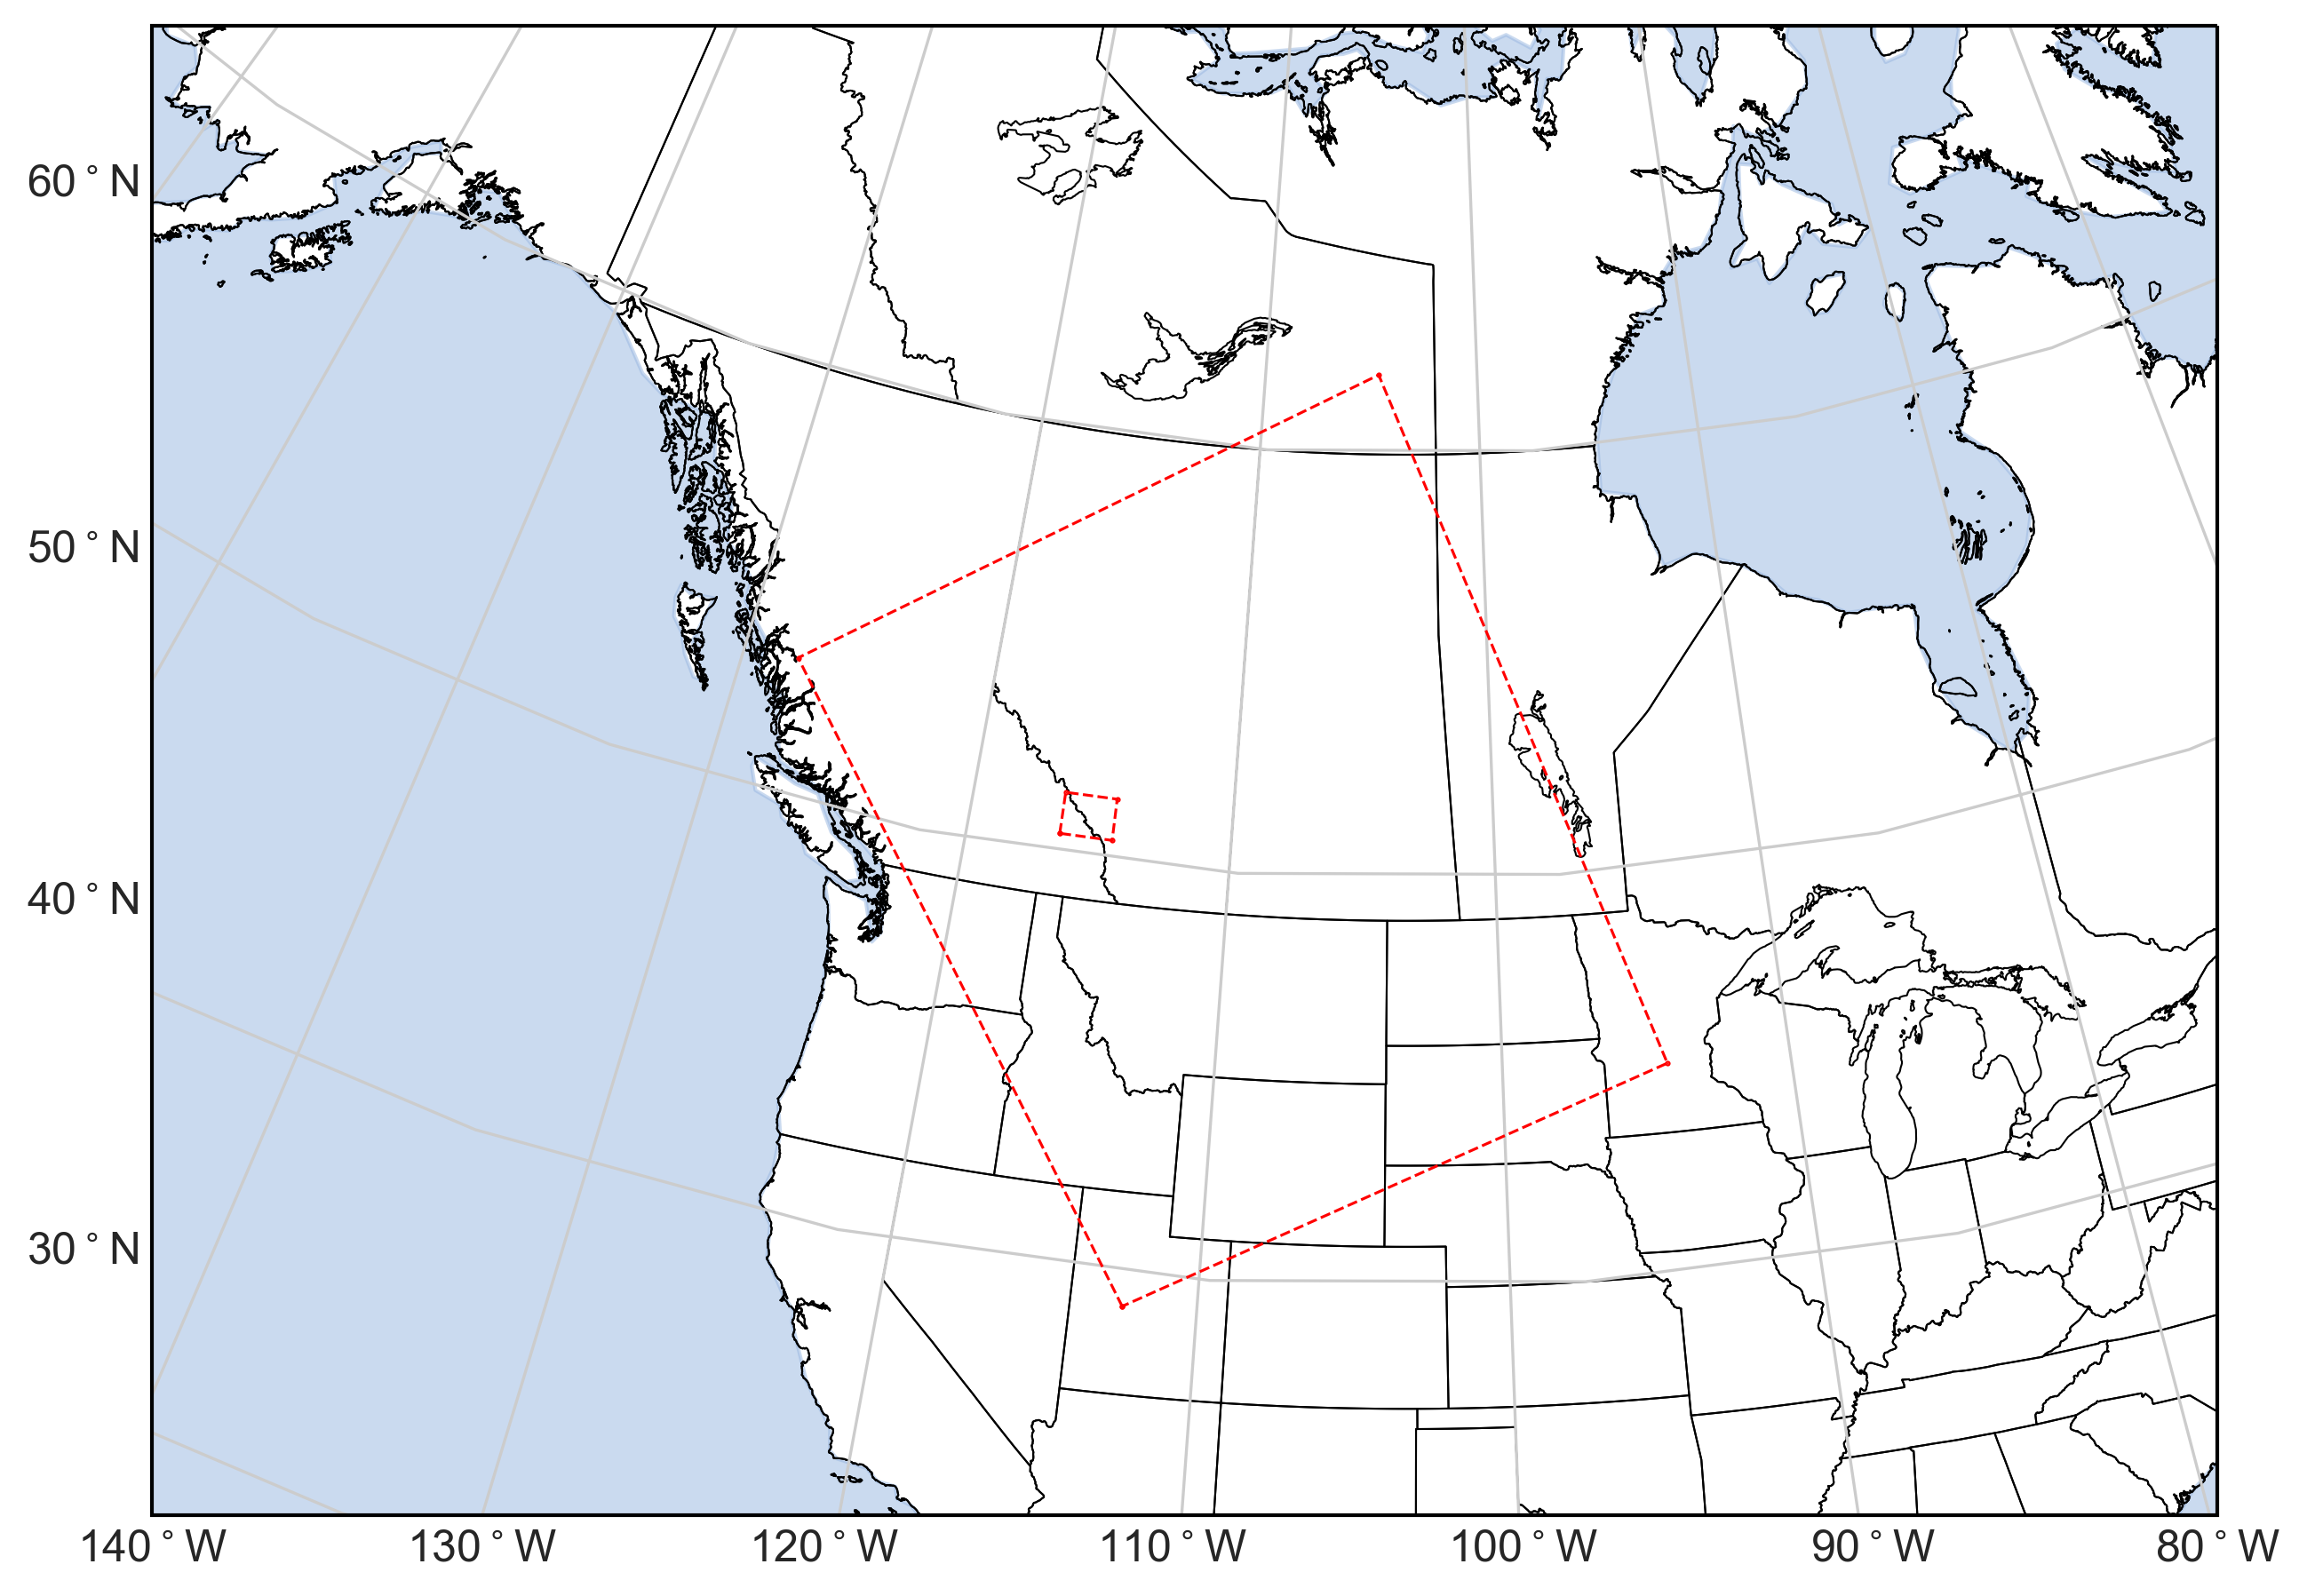

Text(1.0, 1, 'VALID: 15-04-2019')

In [10]:
fig = plt.figure(figsize=(10, 10), dpi=300, facecolor='white')
ax = plt.subplot(projection=mapproj)

# Set extent and plot map lines
ax.set_extent([UL_lon-10, LR_lon+10, LL_lat-5, UR_lat+5], dataproj)
#ax.gridlines(alpha=.5)
#ax.add_feature(cfeature.LAND)
ax.add_feature(states_provinces, edgecolor='black', linewidth=.5)
ax.coastlines('10m', edgecolor='black', linewidth=.5)

# workaround for drawing lines
x_lines = np.arange(180,-180,-10)
y_lines = np.arange(0,90,10)
gl = ax.gridlines()
gl.xlocator = ticker.FixedLocator(x_lines)
gl.ylocator = ticker.FixedLocator(y_lines)

ax.add_feature(cfeature.OCEAN, alpha=.5)

x, y = [LL_lon,UL_lon,UR_lon,LR_lon,LL_lon], [LL_lat,UL_lat,UR_lat,LR_lat,LL_lat]
ax.plot(x, y, marker='o', markersize=.5, color='red', linewidth=.75, linestyle='--', transform=dataproj)
#ax.fill(x, y, color='red', transform=dataproj, alpha=0.10)

small_x = [smallLL_lon,smallUL_lon,smallUR_lon,smallLR_lon,smallLL_lon]
small_y = [smallLL_lat,smallUL_lat,smallUR_lat,smallLR_lat,smallLL_lat]
ax.plot(small_x, small_y, marker='o', markersize=.5, color='red', linewidth=.75, linestyle='--', transform=dataproj)

# cmap = plt.cm.gist_earth
# ls = LightSource(235, 45)
# shading = ls.hillshade(topo_f, vert_exag=0.1)
# levels = np.arange(0, 1.01, .01)
# cs1 = ax.contourf(lons, lats, shading, levels, cmap=cmap, transform=dataproj, alpha=.5)
# 
# workaround functions for labels (the extent will change if you draw more or less lats and lons:
x_labels = np.arange(-80,-150,-10) #want these longitudes as tick positions
y_labels = np.arange(30,65,10) #want these latitudes as tick positions
tick_fs = 12
cartopy_xlabel(ax,x_labels,mapproj,tick_fs)
cartopy_ylabel(ax,y_labels,mapproj,tick_fs)

ax.set_title('SPADE simulation domain', loc='left', fontsize=8)
ax.set_title('VALID: 15-04-2019', loc='right', fontsize=8)